In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True

In [29]:
fpath = "/Users/barrychen/Desktop/IELTSWritingHelper/datasets_ready/Task_Achievement.csv"

df = pd.read_csv(fpath)

df['score'] = df['score'].round(1)

df.head()

,prompt,essay,text,score
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,The essay effectively addresses the given task...,7.0
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,The candidate has effectively addressed the gi...,5.0
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,The candidate has effectively addressed the gi...,6.5
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,The candidate has adequately addressed the tas...,6.0
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,The essay adequately addresses the task by dis...,3.5


In [11]:
df.shape

(9791, 4)

In [12]:
value_counts_df = df["score"].value_counts().reset_index()
value_counts_df.columns = ["score", "count"]
value_counts_df = value_counts_df.sort_values(by="score", ascending=False).reset_index(drop=True)
value_counts_df

,score,count
0,2050.0,12
1,2008.0,1
2,2002.0,1
3,2000.0,1
4,1995.0,1
5,1980.0,1
6,200.0,1
7,75.0,1
8,58.0,1
9,34.0,1


**Labelling:**

* 0->2.0
* 1->2.5
* 2->3.0
* 3->3.5
* 4->4.0
* 5->4.5
* 6->5.0
* 7->5.5
* 8->6.0
* 9->6.5
* 10->7.0
* 11->7.5
* 12->8.0
* 13->8.5
* 14->9.0

In [13]:
df_filtered = df[(df['score'] > 1.5) & (df['score'] < 12.0)]

reverse_mapping = {
    2.0: 0,
    2.5: 1,
    3.0: 2,
    3.5: 3,
    4.0: 4,
    4.5: 5,
    5.0: 6,
    5.5: 7,
    6.0: 8,
    6.5: 9,
    7.0: 10,
    7.5: 11,
    8.0: 12,
    8.5: 13,
    9.0: 14
}

df_filtered['score'] = df_filtered['score'].map(reverse_mapping)

In [14]:
value_counts_df = df_filtered["score"].value_counts().reset_index()
value_counts_df.columns = ["score", "count"]
value_counts_df = value_counts_df.sort_values(by="score", ascending=False).reset_index(drop=True)
value_counts_df

,score,count
0,14,57
1,13,234
2,12,739
3,11,527
4,10,1804
5,9,1560
6,8,1818
7,7,439
8,6,409
9,5,285


**Labelling:**

* 0->2.0 - 2.5
* 1->3.0 - 3.5
* 2->4.0 - 4.5
* 3->5.0 - 5.5
* 4->6.0 - 6.5
* 5->7.0 - 7.5
* 6->8.0 - 8.5
* 7->9.0

In [3]:
df_filtered = df[(df['score'] > 1.5) & (df['score'] < 12.0)]

reverse_mapping_2 = {
    2.0: 0, 2.5: 0,
    3.0: 1, 3.5: 1,
    4.0: 2, 4.5: 2,
    5.0: 3, 5.5: 3,
    6.0: 4, 6.5: 4,
    7.0: 5, 7.5: 5,
    8.0: 6, 8.5: 6,
    9.0: 7
}

df_filtered['score'] = df_filtered['score'].map(reverse_mapping_2)


In [4]:
value_counts_df = df_filtered["score"].value_counts().reset_index()
value_counts_df.columns = ["score", "count"]
value_counts_df = value_counts_df.sort_values(by="score", ascending=False).reset_index(drop=True)
value_counts_df

,score,count
0,7,57
1,6,978
2,5,2339
3,4,3389
4,3,858
5,2,1185
6,1,834
7,0,103


**Labelling:**

* 0->3.5 - 4.0
* 1->4.5 - 5.0
* 2->5.5 - 6.0
* 3->6.5 - 7.0
* 4->7.5 - 8.0
* 5->8.5 - 9.0

In [35]:
df_filtered = df[(df['score'] > 3.0) & (df['score'] < 12.0)]

reverse_mapping_3 = {
    3.5: 0, 4.0: 0,
    4.5: 1, 5.0: 1,
    5.5: 2, 6.0: 2,
    6.5: 3, 7.0: 3,
    7.5: 4, 8.0: 4,
    8.5: 5, 9.0: 5
}

df_filtered['score'] = df_filtered['score'].map(reverse_mapping_3)

df_sampled = df_filtered.groupby('score').sample(
    n=290, 
    random_state=42
).reset_index(drop=True)

In [36]:
value_counts_df = df_filtered["score"].value_counts().reset_index()
value_counts_df.columns = ["score", "count"]
value_counts_df = value_counts_df.sort_values(by="score", ascending=False).reset_index(drop=True)
value_counts_df

,score,count
0,5,291
1,4,1266
2,3,3364
3,2,2257
4,1,694
5,0,1330


In [37]:
df_sampled

,prompt,essay,text,score
0,Some people say that to prevent illness and di...,Emerging disease is a complex matter as it IS ...,The candidate has effectively addressed the gi...,0
1,Nowadays celebrities are more famous for their...,"In this present world, famous personalities a...",The essay adequately addresses the task and at...,0
2,More people decided to have children in their ...,"currently, there are more and more people make...",The essay generally addresses the task by disc...,0
3,Many people believe that the current system of...,Once every month no private vehicles a day ca...,The essay fails to address the prompt effectiv...,0
4,Some people think that instead of preventing c...,"In today's time, human activities are having a...",The essay effectively addresses the given task...,0
...,...,...,...,...
1735,some countries more and more people are becomi...,"In many nations, more and more humans are rese...",The essay effectively addresses the given task...,5
1736,Human activities have negative effects on plan...,"Nowadays, industrialisation has increased rapi...",The candidate has effectively addressed the gi...,5
1737,Nowadays people use social media to keep in to...,"In this contemporary era, the hitches allied t...",The candidate has effectively addressed the gi...,5
1738,Many customs and traditional ways of behaviour...,The vibrancy of modern life has led to debates...,The candidate effectively addresses the task b...,5


In [38]:
value_counts_df = df_sampled["score"].value_counts().reset_index()
value_counts_df.columns = ["score", "count"]
value_counts_df = value_counts_df.sort_values(by="score", ascending=False).reset_index(drop=True)
value_counts_df

,score,count
0,5,290
1,4,290
2,3,290
3,2,290
4,1,290
5,0,290


# Run

### Setup

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
import torch
from torch.nn.functional import softmax
import datasets
from datasets import load_dataset, Dataset
import random
from torch.utils.data import DataLoader, Subset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchmetrics import F1Score
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

In [2]:
fpath = "/Users/barrychen/Desktop/IELTSWritingHelper/datasets_ready/Task_Achievement.csv"
df = pd.read_csv(fpath)
df['score'] = df['score'].round(1)
df_filtered = df[(df['score'] > 1.5) & (df['score'] < 12.0)]

reverse_mapping_3 = {
    3.5: 0, 4.0: 0,
    4.5: 1, 5.0: 1,
    5.5: 2, 6.0: 2,
    6.5: 3, 7.0: 3,
    7.5: 4, 8.0: 4,
    8.5: 5, 9.0: 5
}

df_filtered['score'] = df_filtered['score'].map(reverse_mapping_3)

df_sampled = df_filtered.groupby('score').sample(
    n=290, 
    random_state=42
).reset_index(drop=True)

df_sampled['score'] = df_sampled['score'].astype(int)

dataset = Dataset.from_pandas(df_sampled)

In [3]:
df_sampled

,prompt,essay,text,score
0,Some people say that to prevent illness and di...,Emerging disease is a complex matter as it IS ...,The candidate has effectively addressed the gi...,0
1,Nowadays celebrities are more famous for their...,"In this present world, famous personalities a...",The essay adequately addresses the task and at...,0
2,More people decided to have children in their ...,"currently, there are more and more people make...",The essay generally addresses the task by disc...,0
3,Many people believe that the current system of...,Once every month no private vehicles a day ca...,The essay fails to address the prompt effectiv...,0
4,Some people think that instead of preventing c...,"In today's time, human activities are having a...",The essay effectively addresses the given task...,0
...,...,...,...,...
1735,some countries more and more people are becomi...,"In many nations, more and more humans are rese...",The essay effectively addresses the given task...,5
1736,Human activities have negative effects on plan...,"Nowadays, industrialisation has increased rapi...",The candidate has effectively addressed the gi...,5
1737,Nowadays people use social media to keep in to...,"In this contemporary era, the hitches allied t...",The candidate has effectively addressed the gi...,5
1738,Many customs and traditional ways of behaviour...,The vibrancy of modern life has led to debates...,The candidate effectively addresses the task b...,5


In [4]:
dataset

Dataset({
    features: ['prompt', 'essay', 'text', 'score'],
    num_rows: 1740
})

### Fine tune the model

#### Trial #1 (15 labels)

/Users/barrychen/anaconda3/envs/ece1786/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at mrm8488/deberta-v3-ft-financial-news-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([15]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([15, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9743 [00:00<?, ? examples/s]

/Users/barrychen/anaconda3/envs/ece1786/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
 33%|███▎      | 974/2922 [4:06:58<8:13:56, 15.21s/it]


Epoch 1/3: train loss 2.1748, val loss 2.0172, val f1 score 0.2475


Epoch 2/3: train loss 1.9927, val loss 1.9824, val f1 score 0.2428


Epoch 3/3: train loss 1.9430, val loss 1.9722, val f1 score 0.2466


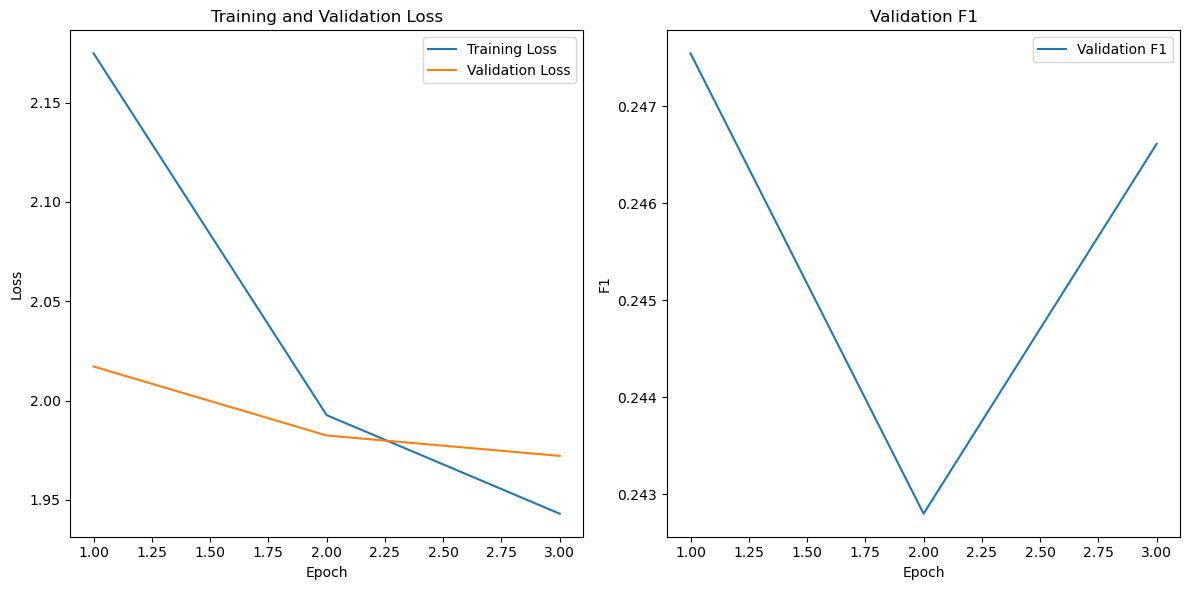

Final validation F1: 0.2466


In [58]:
num_labels = 15

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis", num_labels=num_labels, ignore_mismatched_sizes=True)

# Tokenization function
def tokenize_function(examples):
    # Concatenate the input columns for each example in the batch
    combined_text = [
        p + " " + e + " " + t for p, e, t in zip(examples["prompt"], examples["essay"], examples["text"])
    ]
    # Tokenize the concatenated text
    return tokenizer(combined_text, padding="max_length", truncation=True, max_length=1024)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["prompt", "essay", "text"])
tokenized_datasets = tokenized_datasets.rename_column("score", "labels")
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Get the labels from the tokenized dataset
labels = tokenized_datasets["labels"]

# Get the unique labels
unique_labels = np.unique(labels)

# Store the indices for each label
label_to_indices = {label: np.where(labels == label)[0] for label in unique_labels}

# Lists to hold the train and validation indices
train_indices = []
val_indices = []

# For each label, split the indices into train and validation
for label, indices in label_to_indices.items():
    # Shuffle the indices within each label to ensure random splitting
    np.random.shuffle(indices)
    
    # Split 80% for training, 20% for validation
    split_idx = int(0.8 * len(indices))
    train_indices.extend(indices[:split_idx])
    val_indices.extend(indices[split_idx:])

# Convert indices to tensors
train_indices = torch.tensor(train_indices)
val_indices = torch.tensor(val_indices)

# Create Subsets for train and validation datasets
train_dataset = Subset(tokenized_datasets, train_indices)
eval_dataset = Subset(tokenized_datasets, val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(eval_dataset, batch_size=8)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-6)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Move model to device (GPU if available)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Initialize lists to track training/validation losses and accuracies
train_losses = []
val_losses = []
val_f1_scores = []

# Training loop
progress_bar = tqdm(range(num_training_steps))

# Initialize F1 score metric (weighted-averaged for multi-class classification)
f1_metric = F1Score(task="multiclass", num_classes=num_labels, average="weighted").to(device)

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    f1_metric.reset()
    model.train()

    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        epoch_train_loss += loss.item()
        progress_bar.update(1)

    # Record training loss for the epoch
    train_losses.append(epoch_train_loss / len(train_dataloader))

    # Evaluate the model
    model.eval()
    for batch in eval_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        loss = F.cross_entropy(logits, batch["labels"])

        epoch_val_loss += loss.item()
        f1_metric(predictions, batch["labels"])  # Update F1 metric with predictions

    # Record validation loss and accuracy
    val_losses.append(epoch_val_loss / len(eval_dataloader))
    val_f1 = f1_metric.compute().item()
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}/{num_epochs}: train loss {train_losses[-1]:.4f}, val loss {val_losses[-1]:.4f}, val f1 score {val_f1_scores[-1]:.4f}")

# Plotting function
def eval_plot(train_losses, val_losses, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_f1_scores, label="Validation F1")
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.legend()
    plt.title('Validation F1')

    plt.tight_layout()
    plt.show()

# Plot train loss, validation loss, validation accuracy
eval_plot(train_losses, val_losses, val_f1_scores)

# Print final validation accuracy
print(f"Final validation F1: {val_f1_scores[-1]:.4f}")

#### Trial #2 (8 labels)

In [ ]:
num_labels = 8

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis", num_labels=num_labels, ignore_mismatched_sizes=True)

# Tokenization function
def tokenize_function(examples):
    # Concatenate the input columns for each example in the batch
    combined_text = [
        p + " " + e + " " + t for p, e, t in zip(examples["prompt"], examples["essay"], examples["text"])
    ]
    # Tokenize the concatenated text
    return tokenizer(combined_text, padding="max_length", truncation=True, max_length=1024)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["prompt", "essay", "text"])
tokenized_datasets = tokenized_datasets.rename_column("score", "labels")
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Get the labels from the tokenized dataset
labels = tokenized_datasets["labels"]

# Get the unique labels
unique_labels = np.unique(labels)

# Store the indices for each label
label_to_indices = {label: np.where(labels == label)[0] for label in unique_labels}

# Lists to hold the train and validation indices
train_indices = []
val_indices = []

# For each label, split the indices into train and validation
for label, indices in label_to_indices.items():
    # Shuffle the indices within each label to ensure random splitting
    np.random.shuffle(indices)
    
    # Split 80% for training, 20% for validation
    split_idx = int(0.8 * len(indices))
    train_indices.extend(indices[:split_idx])
    val_indices.extend(indices[split_idx:])

# Convert indices to tensors
train_indices = torch.tensor(train_indices)
val_indices = torch.tensor(val_indices)

# Create Subsets for train and validation datasets
train_dataset = Subset(tokenized_datasets, train_indices)
eval_dataset = Subset(tokenized_datasets, val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(eval_dataset, batch_size=8)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Move model to device (GPU if available)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Initialize lists to track training/validation losses and accuracies
train_losses = []
val_losses = []
val_f1_scores = []

# Training loop
progress_bar = tqdm(range(num_training_steps))

# Initialize F1 score metric (weighted-averaged for multi-class classification)
f1_metric = F1Score(task="multiclass", num_classes=num_labels, average="weighted").to(device)

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    f1_metric.reset()
    model.train()

    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        epoch_train_loss += loss.item()
        progress_bar.update(1)

    # Record training loss for the epoch
    train_losses.append(epoch_train_loss / len(train_dataloader))

    # Evaluate the model
    model.eval()
    for batch in eval_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        loss = F.cross_entropy(logits, batch["labels"])

        epoch_val_loss += loss.item()
        f1_metric(predictions, batch["labels"])  # Update F1 metric with predictions

    # Record validation loss and accuracy
    val_losses.append(epoch_val_loss / len(eval_dataloader))
    val_f1 = f1_metric.compute().item()
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}/{num_epochs}: train loss {train_losses[-1]:.4f}, val loss {val_losses[-1]:.4f}, val f1 score {val_f1_scores[-1]:.4f}")

# Plotting function
def eval_plot(train_losses, val_losses, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_f1_scores, label="Validation F1")
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.legend()
    plt.title('Validation F1')

    plt.tight_layout()
    plt.show()

# Plot train loss, validation loss, validation accuracy
eval_plot(train_losses, val_losses, val_f1_scores)

# Print final validation accuracy
print(f"Final validation F1: {val_f1_scores[-1]:.4f}")

 33%|███▎      | 174/522 [1:01:41<1:47:32, 18.54s/it]

Epoch 1/3: train loss 1.8550, val loss 1.7364, val f1 score 0.1586

 57%|█████▋    | 295/522 [1:44:33<1:18:27, 20.74s/it]

#### Trial #3 (6 labels)

/Users/barrychen/anaconda3/envs/ece1786/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at mrm8488/deberta-v3-ft-financial-news-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1740 [00:00<?, ? examples/s]

/Users/barrychen/anaconda3/envs/ece1786/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
 33%|███▎      | 174/522 [1:01:26<2:15:58, 23.45s/it]

Epoch 1/3: train loss 1.7717, val loss 1.5932, val f1 score 0.2099


 67%|██████▋   | 348/522 [2:05:38<55:42, 19.21s/it]  

Epoch 2/3: train loss 1.5658, val loss 1.5180, val f1 score 0.2293


100%|██████████| 522/522 [3:13:55<00:00, 23.53s/it]  

Epoch 3/3: train loss 1.4829, val loss 1.5034, val f1 score 0.2824


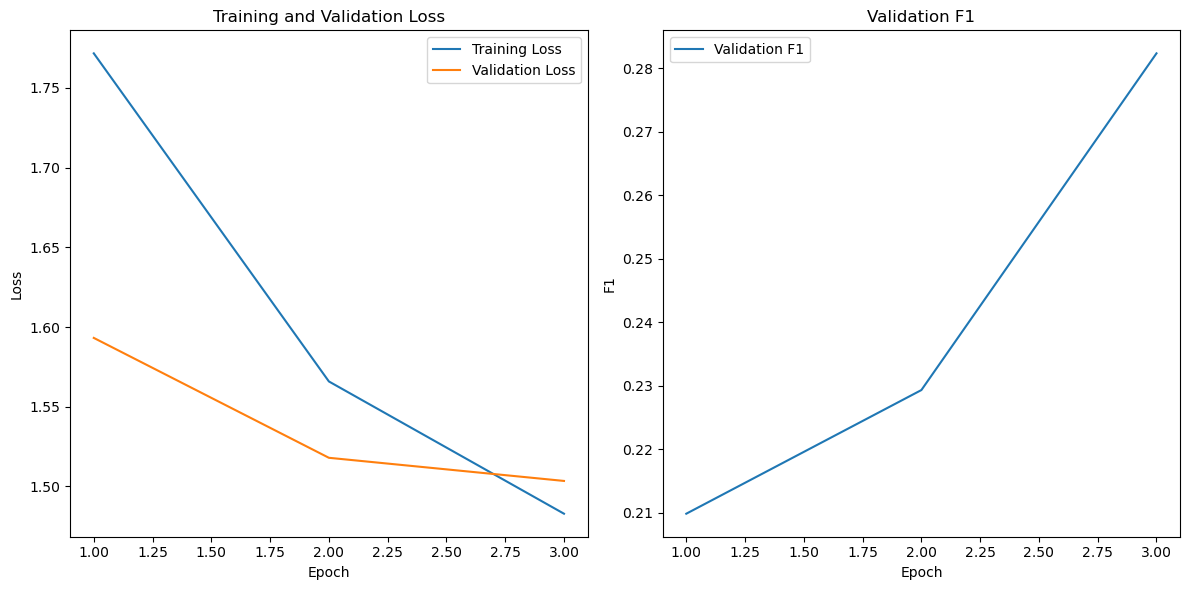

Final validation F1: 0.2824


In [ ]:
num_labels = 6

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis", num_labels=num_labels, ignore_mismatched_sizes=True)

# Tokenization function
def tokenize_function(examples):
    # Concatenate the input columns for each example in the batch
    combined_text = [
        p + " " + e + " " + t for p, e, t in zip(examples["prompt"], examples["essay"], examples["text"])
    ]
    # Tokenize the concatenated text
    return tokenizer(combined_text, padding="max_length", truncation=True, max_length=1024)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["prompt", "essay", "text"])
tokenized_datasets = tokenized_datasets.rename_column("score", "labels")
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Get the labels from the tokenized dataset
labels = tokenized_datasets["labels"]

# Get the unique labels
unique_labels = np.unique(labels)

# Store the indices for each label
label_to_indices = {label: np.where(labels == label)[0] for label in unique_labels}

# Lists to hold the train and validation indices
train_indices = []
val_indices = []

# For each label, split the indices into train and validation
for label, indices in label_to_indices.items():
    # Shuffle the indices within each label to ensure random splitting
    np.random.shuffle(indices)
    
    # Split 80% for training, 20% for validation
    split_idx = int(0.8 * len(indices))
    train_indices.extend(indices[:split_idx])
    val_indices.extend(indices[split_idx:])

# Convert indices to tensors
train_indices = torch.tensor(train_indices)
val_indices = torch.tensor(val_indices)

# Create Subsets for train and validation datasets
train_dataset = Subset(tokenized_datasets, train_indices)
eval_dataset = Subset(tokenized_datasets, val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(eval_dataset, batch_size=8)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Move model to device (GPU if available)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Initialize lists to track training/validation losses and accuracies
train_losses = []
val_losses = []
val_f1_scores = []

# Training loop
progress_bar = tqdm(range(num_training_steps))

# Initialize F1 score metric (weighted-averaged for multi-class classification)
f1_metric = F1Score(task="multiclass", num_classes=num_labels, average="weighted").to(device)

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    f1_metric.reset()
    model.train()

    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        epoch_train_loss += loss.item()
        progress_bar.update(1)

    # Record training loss for the epoch
    train_losses.append(epoch_train_loss / len(train_dataloader))

    # Evaluate the model
    model.eval()
    for batch in eval_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        loss = F.cross_entropy(logits, batch["labels"])

        epoch_val_loss += loss.item()
        f1_metric(predictions, batch["labels"])  # Update F1 metric with predictions

    # Record validation loss and accuracy
    val_losses.append(epoch_val_loss / len(eval_dataloader))
    val_f1 = f1_metric.compute().item()
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}/{num_epochs}: train loss {train_losses[-1]:.4f}, val loss {val_losses[-1]:.4f}, val f1 score {val_f1_scores[-1]:.4f}")

# Plotting function
def eval_plot(train_losses, val_losses, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_f1_scores, label="Validation F1")
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.legend()
    plt.title('Validation F1')

    plt.tight_layout()
    plt.show()

# Plot train loss, validation loss, validation accuracy
eval_plot(train_losses, val_losses, val_f1_scores)

# Print final validation accuracy
print(f"Final validation F1: {val_f1_scores[-1]:.4f}")

#### Trial #4 (6 labels) not balanced data

In [2]:
fpath = "/Users/barrychen/Desktop/IELTSWritingHelper/datasets_ready/Task_Achievement.csv"
df3 = pd.read_csv(fpath)
df3['score'] = df3['score'].round(1)

df_filtered3 = df3[(df3['score'] > 3.0) & (df3['score'] < 12.0)]

reverse_mapping_3 = {
    3.5: 0, 4.0: 0,
    4.5: 1, 5.0: 1,
    5.5: 2, 6.0: 2,
    6.5: 3, 7.0: 3,
    7.5: 4, 8.0: 4,
    8.5: 5, 9.0: 5
}

# Apply mapping
df_filtered3['score'] = df_filtered3['score'].map(reverse_mapping_3)

# Find the maximum sample size for each class
max_sample_size = df_filtered3['score'].value_counts().min()

# Sample the maximum available size for each class
df_sampled3 = df_filtered3.groupby('score', group_keys=False).apply(
    lambda x: x.sample(len(x), random_state=42)
).reset_index(drop=True)

dataset = Dataset.from_pandas(df_sampled3)

/var/folders/vx/57ntql9x3lg7fsldp3xp6w1c0000gn/T/ipykernel_241/3194682914.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled3 = df_filtered3.groupby('score', group_keys=False).apply(


In [3]:
dataset

Dataset({
    features: ['prompt', 'essay', 'text', 'score'],
    num_rows: 9202
})

In [ ]:
num_labels = 6

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/deberta-v3-ft-financial-news-sentiment-analysis", num_labels=num_labels, ignore_mismatched_sizes=True)

# Tokenization function
def tokenize_function(examples):
    # Concatenate the input columns for each example in the batch
    combined_text = [
        p + " " + e + " " + t for p, e, t in zip(examples["prompt"], examples["essay"], examples["text"])
    ]
    # Tokenize the concatenated text
    return tokenizer(combined_text, padding="max_length", truncation=True, max_length=1024)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["prompt", "essay", "text"])
tokenized_datasets = tokenized_datasets.rename_column("score", "labels")
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Get the labels from the tokenized dataset
labels = tokenized_datasets["labels"]

# Get the unique labels
unique_labels = np.unique(labels)

# Store the indices for each label
label_to_indices = {label: np.where(labels == label)[0] for label in unique_labels}

# Lists to hold the train and validation indices
train_indices = []
val_indices = []

# For each label, split the indices into train and validation
for label, indices in label_to_indices.items():
    # Shuffle the indices within each label to ensure random splitting
    np.random.shuffle(indices)
    
    # Split 80% for training, 20% for validation
    split_idx = int(0.8 * len(indices))
    train_indices.extend(indices[:split_idx])
    val_indices.extend(indices[split_idx:])

# Convert indices to tensors
train_indices = torch.tensor(train_indices)
val_indices = torch.tensor(val_indices)

# Create Subsets for train and validation datasets
train_dataset = Subset(tokenized_datasets, train_indices)
eval_dataset = Subset(tokenized_datasets, val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(eval_dataset, batch_size=8)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 20
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Move model to device (GPU if available)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Initialize lists to track training/validation losses and accuracies
train_losses = []
val_losses = []
val_f1_scores = []

# Training loop
progress_bar = tqdm(range(num_training_steps))

# Initialize F1 score metric (weighted-averaged for multi-class classification)
f1_metric = F1Score(task="multiclass", num_classes=num_labels, average="weighted").to(device)

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    f1_metric.reset()
    model.train()

    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        epoch_train_loss += loss.item()
        progress_bar.update(1)

    # Record training loss for the epoch
    train_losses.append(epoch_train_loss / len(train_dataloader))

    # Evaluate the model
    model.eval()
    for batch in eval_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        loss = F.cross_entropy(logits, batch["labels"])

        epoch_val_loss += loss.item()
        f1_metric(predictions, batch["labels"])  # Update F1 metric with predictions

    # Record validation loss and accuracy
    val_losses.append(epoch_val_loss / len(eval_dataloader))
    val_f1 = f1_metric.compute().item()
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}/{num_epochs}: train loss {train_losses[-1]:.4f}, val loss {val_losses[-1]:.4f}, val f1 score {val_f1_scores[-1]:.4f}")

# Plotting function
def eval_plot(train_losses, val_losses, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_f1_scores, label="Validation F1")
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.legend()
    plt.title('Validation F1')

    plt.tight_layout()
    plt.show()

# Plot train loss, validation loss, validation accuracy
eval_plot(train_losses, val_losses, val_f1_scores)

# Print final validation accuracy
print(f"Final validation F1: {val_f1_scores[-1]:.4f}")

  5%|▌         | 920/18400 [3:09:41<55:31:56, 11.44s/it]

Epoch 1/20: train loss 1.4388, val loss 1.3722, val f1 score 0.4116

 10%|█         | 1840/18400 [7:04:28<52:19:21, 11.37s/it] 

Epoch 2/20: train loss 1.2664, val loss 1.2977, val f1 score 0.4376

 15%|█▌        | 2760/18400 [10:18:06<49:18:12, 11.35s/it] 

Epoch 3/20: train loss 1.1907, val loss 1.2858, val f1 score 0.4437

 20%|██        | 3680/18400 [13:32:26<46:27:29, 11.36s/it]  

Epoch 4/20: train loss 1.1129, val loss 1.3145, val f1 score 0.4334

 25%|██▌       | 4600/18400 [17:50:14<42:05:49, 10.98s/it]   

Epoch 5/20: train loss 1.0316, val loss 1.4134, val f1 score 0.4204

 30%|███       | 5520/18400 [24:13:57<81:39:14, 22.82s/it]   

Epoch 6/20: train loss 0.9332, val loss 1.4699, val f1 score 0.4374

 33%|███▎      | 6026/18400 [28:11:06<91:07:02, 26.51s/it]  